# 网络分析

Learn about the basic components of networks and the graphs that represent them

Learn basic network concepts such as neighbor, degree, path, component, and largest connected component

In [311]:
from scipy.stats import bernoulli
import networkx as nx
import matplotlib.pyplot as plt

## 1. 网络分析介绍

图(graphs)包括结点(nodes, vertices)和边(edges). 数学上看,图是结点(顶点)和边的集合,每一边联系着一对顶点. 我们一般用⚪表示顶点,用线表示边. 有许多概念用来描述图.

邻居: 两个相连的顶点称为邻居.

顶点的度: 与该顶点连接的entries. (重要概念)

路径: 连接两个顶点的边的序列. .
 
路径的长度: 路径中边的数目.

分量的尺寸: 组分中的结点的数目.



最大相连通分量:

## 2. NetworkX基础

学习利用NetworkX模块创建和操作网络图

Previously, G.nodes() returned a list object, while now it returns a NodeView object.

Previously, G.edges() returned a list object, while now it returns an EdgeView object.

In [312]:
import networkx as nx

In [313]:
G = nx.Graph()

In [314]:
G.add_node(1)

In [315]:
G.add_nodes_from([2,3])

In [316]:
G.add_nodes_from(["i","u"])

In [317]:
G.nodes()

NodeView((1, 2, 3, 'i', 'u'))

In [318]:
G.add_edge(1,2)

In [319]:
G.add_edge("u","i")

In [320]:
G.add_edges_from([(1,3),(1,2),(1,4),(1,5)])

In [321]:
G.add_edge("u","w")

In [322]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), ('i', 'u'), ('u', 'w')])

In [323]:
# remove
G.remove_node(2)

In [324]:
G.nodes()

NodeView((1, 3, 'i', 'u', 4, 5, 'w'))

In [325]:
G.remove_nodes_from([4,5])

In [326]:
G.nodes()

NodeView((1, 3, 'i', 'u', 'w'))

In [327]:
G.remove_edge(1,3)

In [328]:
G.edges()

EdgeView([('i', 'u'), ('u', 'w')])

In [329]:
G.remove_edges_from([("u","v"),("u","i")])

In [330]:
G.edges()

EdgeView([('u', 'w')])

In [331]:
# find the no. of nodes and the No. of edges in our graph
G.number_of_nodes()


5

In [332]:
G.number_of_edges()

1

In [333]:
G1 = nx.Graph() 
G1.add_nodes_from([1,2,3,4]) 
G1.add_edges_from([(1,2),(3,4)]) 
G1.number_of_nodes(), G.number_of_edges() 

(4, 1)

## 3. 图的可视化

学会networkx来可视化一个图.

Previously, G.degree() returned a Python dictionary, while now it returns a DegreeView object, which is similar to a dictionary. 

In [334]:
G = nx.karate_club_graph()
# the No. of nodes
len(G.nodes())
G.number_of_nodes()

34

In [335]:
len(G.edges())

78

In [336]:
G.degree(0) is G.degree()[0]

True

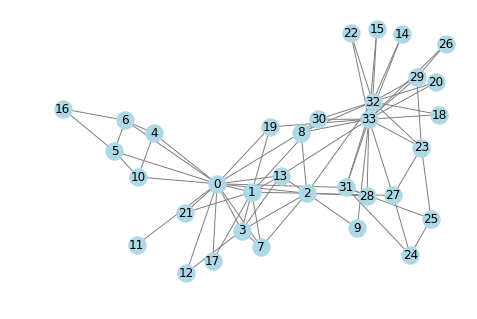

In [337]:
import matplotlib.pyplot as plt
# plot a network
nx.draw(G, with_labels=True,node_color="lightblue",edge_color="gray")

In [338]:
plt.savefig("karate_graph.pdf")

<Figure size 432x288 with 0 Axes>

In [339]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [340]:
G.degree()[33]

17

In [341]:
# 与字典不同的是: DegreeView对象中可以将其关键字传入小括号,从而得到相应的值.
G.degree(33)

17

In [342]:
dic ={1:2, 2: 8}

In [343]:
dic[1]

2

## 4. 随机图

学会写一个函数来创建一个Erdős-Rényi图.

ER图 (Erdos-Renyi)

#### 概率知识准备:

概率质量函数: 离散随机变量在各特定取值上的概率,一般用$f(k)表示$. $k$可取一系列离散值.所有的$k$构成状态空间.

#### 伯努利概率质量函数$f(k)$:
一种具体的概率质量函数,其中$k$只能取0或者1两种值.

举例, 抛硬币的结果只有正面朝上,和反面朝上.前者记为0,后者记为1.状态空间为$\{0,1\}$. 抛硬币的结果是随机的变量,它的值这在状态空间$\{0,1\}$中取. 我们称这样的随机变量为**伯努利随机变量**. 

结果为正面朝上的概率为:$f(0)=1/2$;

结果为反面朝上的概率为:$f(1)=1- 1/2 = 1/2$.

一般地, 伯努利概率质量函数可写为:

 $f(k) = 1-p$, 如果$k=0$;

 $f(k) = p$, 如果$k=1$. $k\in \{0,1\}$

bernoulli将$p$作为其形状参数.

#### bernoulli上可用的方法:

随机变量: 取出其随机变量.此处只会有0或1两种结果.

rvs(p, loc=0, size=1, random_state=None)

概率质量函数: 

pmf(k,p, loc=0)

熵:

entropy(p,loc=0)

平均值:

mean(p, loc=0)

In [344]:
# 结果为1的概率
bernoulli.pmf(1, 0.3)

0.3

In [345]:
# 结果为0的概率
bernoulli.pmf(0, 0.3)

0.7000000000000001

In [346]:
from scipy.stats import bernoulli, norm
bernoulli.rvs(p=0.2)

0

In [347]:
bernoulli.rvs(p=0.2)

0

In [348]:
bernoulli.rvs(p=0.8)

1

In [349]:
bernoulli.entropy(0)

array(0.)

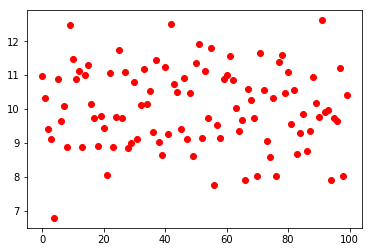

In [350]:
import matplotlib.pyplot as plt
y = norm.rvs(loc=10,size=100)
plt.plot(y, "or")


In [351]:
N= 20
p = 0.2

# create empty graph
G = nx.Graph()
# add all N nodes in the graph
G.add_nodes_from(range(N))

# loop over all pairs of nodes
   # add an edge with prob p
for node1 in G.nodes():
    for  node2 in G.nodes():
        # WRONG: if bernoulli.rvs(p=p):
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1, node2)

In [352]:
G.number_of_nodes()

20

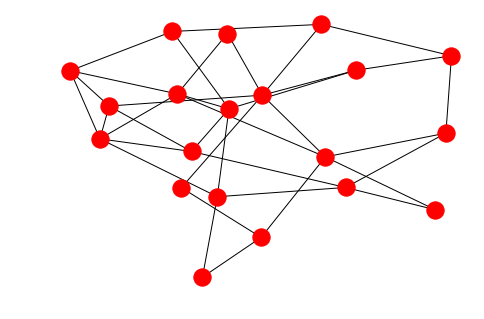

In [353]:
# draw the gra
nx.draw(G)

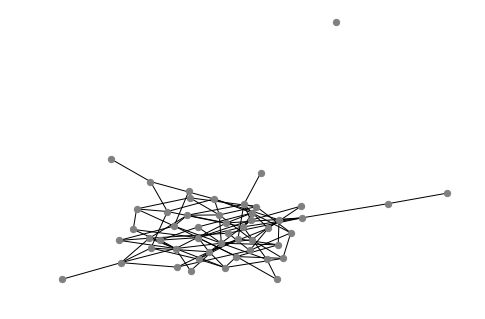

In [354]:
# 把上面的代码封装成函数
def er_graph(N,p):
    """X"""
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for node1 in G.nodes():
        for  node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G
nx.draw(er_graph(50,0.08), node_size=40,node_color="gray")
plt.savefig("er_graph.pdf")

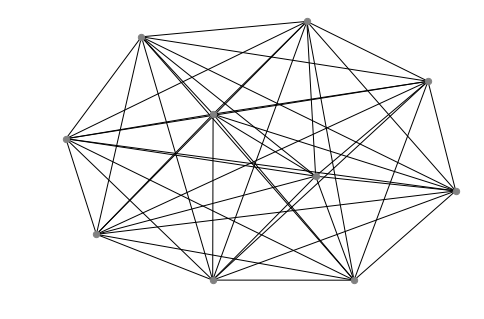

In [355]:
# 以下命令产生多少个分量（组分）?
nx.draw(er_graph(10,1), node_size=40,node_color="gray")

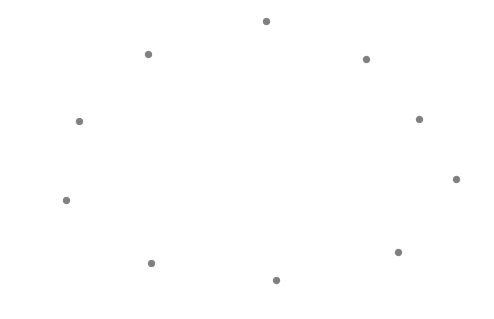

In [356]:
# 以下命令产生多少个组分?
nx.draw(er_graph(10,0), node_size=40,node_color="gray")

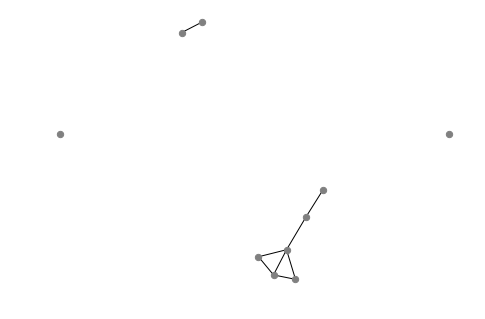

In [357]:
# 以下命令产生多少个组分?
nx.draw(er_graph(10,0.2), node_size=40,node_color="gray")

## 5. 度分布的作图

学习目标: plot the degree distribution of a graph

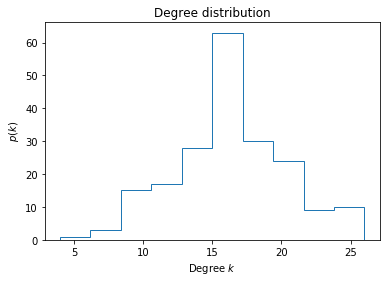

In [358]:
def plot_deg_dist(G):
    degree_sequence = [d for n,d in G.degree()]
    #plt.hist(degree_sequence, histtype="bar")
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$p(k)$")
    plt.title("Degree distribution")
    
#G = er_graph(50,0.08)
G = er_graph(200,0.08)
plot_deg_dist(G)
plt.savefig("hist_dist.pdf")

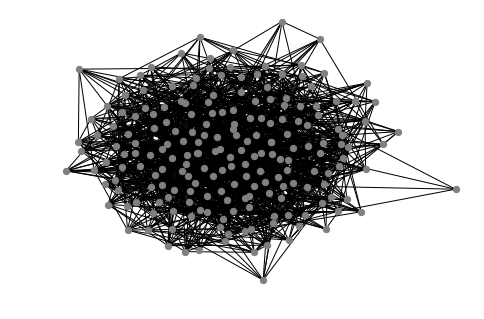

In [359]:
nx.draw(G,node_size=40,node_color="gray")

由分布图可知, 不存在超过27个连接的结点.也不存在小于7个连接的结点;

大多数结点具有的连接数目在12个到24个之间.

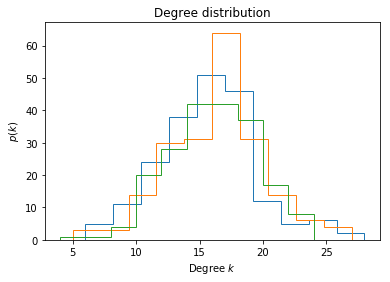

In [360]:
G1 = er_graph(200,0.08)
plot_deg_dist(G1)

G2 = er_graph(200,0.08)
plot_deg_dist(G2)

G3 = er_graph(200,0.08)
plot_deg_dist(G3)
plt.savefig("hist_dist_3.pdf")

分析: 三个分布图有些不同,但分布有共同特点: 大多数结点具有的连接数目在12个到24个之间.

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

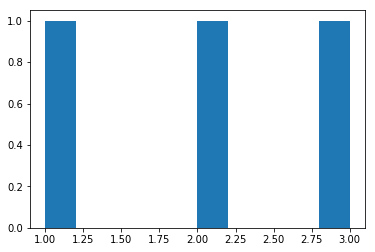

In [361]:
# ex
D = {1:1, 2:2, 3:3} 
# 原题: plt.hist(D). 答案: 命令有误.
plt.hist(D.values())

In [362]:
# ex2 : 对比
G4= nx.erdos_renyi_graph(100, 0.03)
G5= nx.erdos_renyi_graph(100, 0.3)

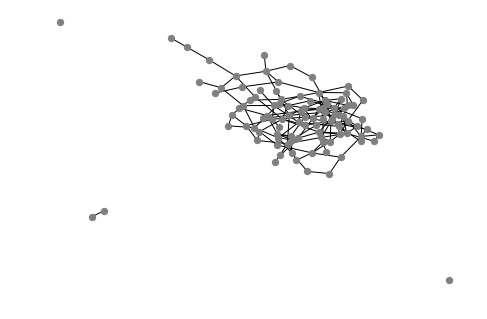

In [363]:
nx.draw(G4,node_size=40,node_color="gray")

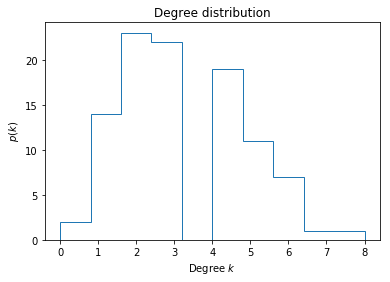

In [364]:
plot_deg_dist(G4)

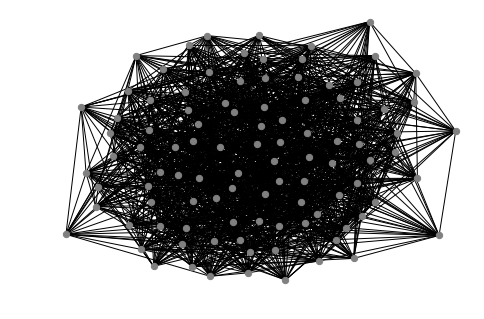

In [365]:
nx.draw(G5,node_size=40,node_color="gray")

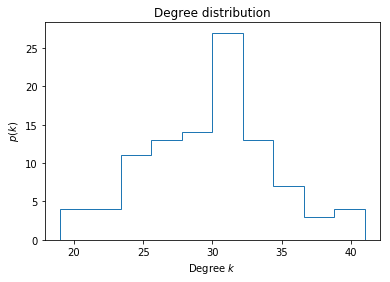

In [366]:
plot_deg_dist(G5)

结果: G5的分布的平均值大于G4的分布.

## 6. 社交网络的描述与统计

学习目标:

1. 寻找社交网络基本性质

2. 利用ER网络的度分布函数对比社交网络的度分布

 G.degree() 返回一个DegreeView对象,而不是一个字典. DegreeView对象与字典非常相似.

数据的获取:

人口普查后,个人的子集被问细致的问题(关于他们与村里其他人的关系).
搜集了所有家庭和所有个人信息.


网络的**邻接矩阵** $A$(Adjacency matrix): 

定义: 如果我们有n个结点,此矩阵是一$n\times n$矩阵; 

如果结点$i$,$j$为邻居,则$A_{ij}=1$, 否则,$A_{ij}=0$. 

邻接矩阵的性质: 

(1) 无向图: 如果连接结点$i$与$j$的边,可以由连接结点$j$与$i$的边.

无向图的邻接矩阵$A$是对称的: $A_{ij} = A_{ji}$. 从定义可知,它们要么都为0, 要么都为1.




In [367]:
# 两个村庄的邻接矩阵文件 *.csv
# 1. 读取该文件,并构建网络
    # np.loadtxt()用来读取邻接矩阵(csv文件)
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_2.csv", delimiter=",")


G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

def basic_net_stats(G):
    print(G.number_of_nodes())
    print(G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))
basic_net_stats(G1)
basic_net_stats(G2)

843
3405
Average degree: 8.08
877
3063
Average degree: 6.99


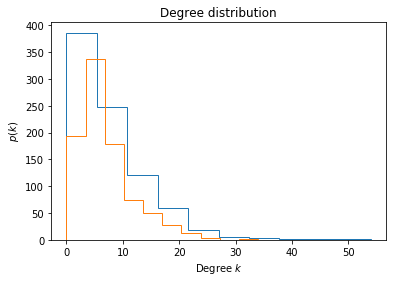

In [368]:
# 调用自定义函数
plot_deg_dist(G1)
plot_deg_dist(G2)
plt.savefig("village_hist.pdf")

分析: 
1. 大多数顶点(人)具有很少的度,而少量的结点(人)有大量的度.
2. 度分布函数看起来并不对称, 右边尾部太长.
3. ER图对真实世界的社交网络而言不是一个很好的模型. (实际工作中,我们只把ER图为一种参考,主要用于与其他社交网络模型做对比.)

## 7. 最大连通分量

In [369]:
nx.connected_component_subgraphs(G1)

<generator object connected_component_subgraphs at 0x7f98b1539a20>

In [370]:
gen = nx.connected_component_subgraphs(G1)

In [371]:
g = gen.__next__()

In [372]:
type(g)

networkx.classes.graph.Graph

In [373]:
g.number_of_nodes()

825

In [374]:
# len(): 输入图,返回图之结点数目
len(g)

825

len(): 输入generator next, Python只会依次查看一个一个分量,
 
 每个分量有一个尺寸,即其结点数目, len()就返回该值.
 
 所以如果我们多运行几次此命令,可能会看到不一样的输出.
 
 Python查看这些分量的顺序是任意的.

In [375]:
len(gen.__next__())

3

In [376]:
len(gen.__next__())

3

注意: 在实际应用时,没人这样调用next方法.取代它的是另一些方法.

例如: max(),得到一个序列的最大值. 

其输入参数可以是一个生成器(generator). 

对于两个图A和B,max()函数如何判断哪一个大呢? 

图的大小我们还没定义呢!  

用key这个关键字参数来定义.



In [377]:
gen = nx.connected_component_subgraphs(G1)
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

In [378]:
len(G1_LCC)

825

In [379]:
G1_LCC.number_of_nodes()

825

In [380]:
len(G2_LCC)

810

In [381]:
# 最大分量的结点数目与总结点数目之比
G1_LCC.number_of_nodes() / G1.number_of_nodes()

0.9786476868327402

In [382]:
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

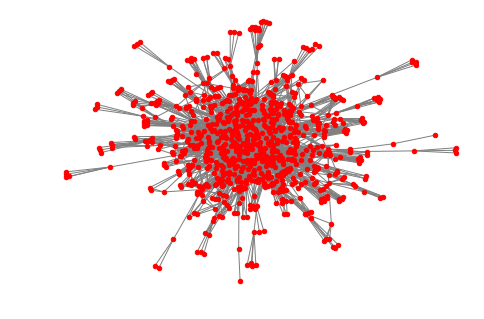

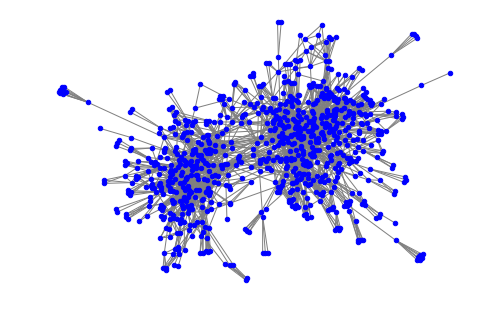

In [383]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.savefig("village1.pdf")
plt.figure()
nx.draw(G2_LCC, node_color="blue", edge_color="gray", node_size=20)
plt.savefig("village2.pdf")

分析:

    1. G2_LCC 可分成两个组, 这称为网络社区(网路社群, network commulities).
    2. 网络社区内的结点连接紧密,而网络社区里的结点和其外面的结点连接较少.
    3. 找出网络社区是一个值得关注的问题(数学问题).
  



## 8. 同质性
同质性(Homophily)是网络的一个特征. 含义: 相邻的结点具有一些共同的特征.(love of the same) 
同质性,即同与自身具有相似的类型的个体相互作用的趋势("the tendency to interact with others of similar type" )在自然界普遍地存在.[3]

该项目中,我们研究一个真实的网络(两个村庄(Village 1和Village 2)的人构成的网络)的几个特征的同质性.

### 1.
对任意一个特征, 计算它的机会同质性(chance homophily). 
同质性是指, 网络中的边所占的比例. 组成边(or 网络)的结点都有该特征. 

(维基百科: Individuals in homophilic relationships share common characteristics (beliefs, values, education, etc.) that make communication and relationship formation easier. The opposite of homophily is heterophily or intermingling.)

如果特征完全随机地分布, 我们能得到的同质程度是多少? 

如果特征完全随机地分布, 
那么两个结点$x$和$y$具有共同特征a的概率为$x$,$y$都有特征a的概率, 记为 $f(a)^2$, $f(a)$表示结点具有特征a的频率.

$x$和$y$结点具有共同特征的总概率为: 该网络中每一个特征频率之和. (联合概率)

例如, 在字典favorite_colors中, 红色和蓝色的频率分别是1/3, 2/3, 故机会同质(chance homophily)是
$(1/3)^2+(2/3)^2 = 5/9$. (相加, joint probability.)

## 9. 网络分析项目

(1)创建一个函数(自己命名),输入参数为一个字典chars(关键字为个人ID,值为特征), 
返回一个字典,其关键字为特征,其值为此特征出现的次数.


In [384]:
from collections import Counter

def function(chars):
    return dict(Counter(chars.values()))

# 传入一个字典,用来测试该函数
chars = {"001": "Male", "002": "Male", "003":"Female", "004":"Male"}
print(function(chars))
# 测试
print("001" in chars)

{'Male': 3, 'Female': 1}
True


(2)创建一个函数frequency(chars),输入参数为一个字典chars(关键字为个人ID,值为特征), 
返回一个字典,其关键字为特征,其值为此特征出现的频率.

In [385]:
from collections import Counter
def frequency(chars):
    frequencies = dict(Counter(chars.values()))
    sum_frequencies = sum(frequencies.values())
    for key in frequencies:
        frequencies[key] /= sum_frequencies
    return frequencies

# 对你自己建立的字典,测试该函数
print(frequency(chars) )



{'Male': 0.75, 'Female': 0.25}


(3). 创建一个函数chance_homophily(chars),其中,chars也是一个字典,代表一个特征. 此函数返回该特征的机会同质性.(其含义见上面举的例子)

In [386]:
def chance_homophily(chars):
    frequencies = frequency(chars)
    return np.sum(np.square(list(frequencies.values())))

# 传入特征(一个字典), 测试
chance_homophily(chars)
# 已知,有如下字典, 计算其机会同质性,结果保存到color_homophily. 并打印出来.
favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556




## 2.
接下来, 我们将研究并对比真实的同质性与机会同质性. 

(1)首先,请把数据"personal_characters.dta"读入pandas中, 保存为df. 你可能用的命令: pandas.read_stats().

(2)在数据集df中,将属于Village 1和Village 2的人的数据分离,然后保存两个数据集df1, df2.

(3)查看df2的前五行; 查看所有列名.

In [387]:
import pandas as pd
df  = pd.read_stata("personal_characters.dta")
df1 = df[df["village"]==1]
df2 = df[df["village"]==2]

df1.head()
df.columns

Index(['village', 'adjmatrix_key', 'pid', 'hhid', 'resp_id', 'resp_gend',
       'resp_status', 'age', 'religion', 'caste', 'subcaste', 'mothertongue',
       'speakother', 'kannada', 'tamil', 'telugu', 'hindi', 'urdu', 'english',
       'otherlang', 'educ', 'villagenative', 'native_name', 'native_type',
       'native_taluk', 'native_district', 'res_time_yrs', 'res_time_mths',
       'movereason', 'movecontact', 'movecontact_res', 'movecontact_hhid',
       'movecontact_pid', 'movecontact_name', 'workflag', 'work_freq',
       'work_freq_type', 'occupation', 'privategovt', 'work_outside',
       'work_outside_freq', 'shgparticipate', 'shg_no', 'savings',
       'savings_no', 'electioncard', 'rationcard', 'rationcard_colour'],
      dtype='object')

## 3.

定义六个字典分别用来查询连个村庄的人们的下面几个特征: sex, caste, and religion, 关键字为个人ID. 对 Villages 1 和 Village 2, 个人IDs都存在"pid"列.
 

In [388]:
sex1      = dict(zip(df1["pid"], df1["resp_gend"])) # Enter code here!
caste1    = dict(zip(df1["pid"], df1["caste"]))# Enter code here!
religion1 = dict(zip(df1["pid"], df1["religion"]))# Enter code here!

# Continue for df2 as well.
sex2      = dict(zip(df2["pid"], df2["resp_gend"])) # Enter code here!
caste2    = dict(zip(df2["pid"], df2["caste"]))# Enter code here!
religion2 = dict(zip(df2["pid"], df2["religion"]))# Enter code here!

## 4.
对Village 1 和Village 2, 打印出性别(sex), 种姓(caste),宗教信仰(religion)几个特征的机会同质性. 
函数chance_homophily为前面定义.

In [389]:
print("Village 1 chance of same sex:", chance_homophily(sex1))
# Enter your code here.
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))
# Village 2
print("Village 2 chance of same sex:", chance_homophily(sex2))
print("Village 2 chance of same caste:", chance_homophily(caste2))
print("Village 2 chance of same religion:", chance_homophily(religion2))

Village 1 chance of same sex: 0.5027299861680701
Village 1 chance of same caste: 0.6741488509791551
Village 1 chance of same religion: 0.9804896988521925
Village 2 chance of same sex: 0.5005945303210464
Village 2 chance of same caste: 0.425368244800893
Village 2 chance of same religion: 1.0


## 5.
创建一个函数,用以对于给定的村庄和特征,计算观测到的同质性.

In [390]:
def homophily(G, chars, IDs):
    """
    对已知的网络G, 结点的特征chars,以及网络中的结点的字典IDs, 
    计算该网络的同质性.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges():
        #print(n1,n2)
        if IDs[n1] in chars and IDs[n2] in chars:
            if G.has_edge(n1, n2):
                # Your code
                num_ties += 1
                # Should `num_ties` be incremented?  What about `num_same_ties`?
                if chars[IDs[n1]] == chars[IDs[n2]]:
                    # Your code
                    num_same_ties += 1
                    # Should `num_ties` be incremented?  What about `num_same_ties`?
    return(num_same_ties / num_ties) 

## 6.
我们将得到Village 1 和Village 2的成员的个人ID. 这些值已经分别保存在key_1.csv和key_1.csv文件中了. 

In [391]:
# Enter code here!
data_filepath = ""
pid1 = pd.read_csv(data_filepath+"id_1.csv", header = None)

pid2 = pd.read_csv(data_filepath+"id_2.csv", header = None)

# 将DataFrame转成序列(Series)
type(pid2)
pid1 = pid1.iloc[:,0]
pid2 = pid2.iloc[:,0]

# 查看序列的前10行.
pid1.head()

0    100101
1    100102
2    100103
3    100104
4    100201
Name: 0, dtype: int64

## 7.
对于Village 1 和Village 2, 分别计算几个网络特征的同质性, 并将这个结果与机会同质性做比较. 通过计算结果判断在该网络中,homophily和chance homophily哪一个更大?  

Village 1 和Village 2的网络分别以networkx图的形式保存在G1和G2中.
homophily()和chance_homophily()如前面所定义.

In [392]:
print("Village 1 observed proportion of same sex:", homophily(G1, sex1, pid1))

# Enter your code here!
print("Village 1 observed proportion of same caste:", homophily(G1, caste1, pid1))

print("Village 1 observed proportion of same religion:", homophily(G1, religion1, pid1))

print("Village 2 observed proportion of same sex:", homophily(G2, sex2, pid2))

# Enter your code here!
print("Village 2 observed proportion of same caste:", homophily(G2, caste2, pid2))

print("Village 2 observed proportion of same religion:", homophily(G2, religion2, pid2))

##
print("Village 1 chance homophily of same sex:", chance_homophily( sex1))
print("Village 1 chance homophily of same caste:", chance_homophily( caste1))
print("Village 1 chance homophily of same religion:", chance_homophily( religion1))

print("Village 2 chance homophily of same sex:", chance_homophily( sex2))
print("Village 2 chance homophily of same caste:", chance_homophily( caste2))
print("Village 2 chance homophily of same religion:", chance_homophily( religion2))

Village 1 observed proportion of same sex: 0.5908629441624366
Village 1 observed proportion of same caste: 0.7959390862944162
Village 1 observed proportion of same religion: 0.9908629441624366
Village 2 observed proportion of same sex: 0.5658073270013568
Village 2 observed proportion of same caste: 0.8276797829036635
Village 2 observed proportion of same religion: 1.0
Village 1 chance homophily of same sex: 0.5027299861680701
Village 1 chance homophily of same caste: 0.6741488509791551
Village 1 chance homophily of same religion: 0.9804896988521925
Village 2 chance homophily of same sex: 0.5005945303210464
Village 2 chance homophily of same caste: 0.425368244800893
Village 2 chance homophily of same religion: 1.0


 分析:
 每一种情形,同质性比机会同质性要高些.
 
注意:  'Series' objects are mutable, thus they cannot be hashed


参考:

[1] http://www.analytictech.com/mgt780/topics/homophily.htm

[2] https://www.nytimes.com/2006/12/10/magazine/10Section2a.t-4.html

[3] https://www.nature.com/articles/srep00845.pdf